In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import sys
import os

In [2]:
my_array = np.random.randn(5, 5)
my_array

array([[-1.74729283, -0.25410581, -0.91582061, -0.42386346,  1.46616794],
       [-0.27053903,  1.13006622,  0.24982664, -0.03169248,  1.03059642],
       [ 0.46747935,  0.19267269, -1.48094421, -0.88057335, -0.47839561],
       [ 1.14046047,  0.274181  ,  1.6083666 , -2.19448487,  0.35634168],
       [-0.99165843,  0.40675212,  1.04384725, -1.37574855, -0.27415024]])

In [3]:
df = pd.DataFrame(my_array, columns = ['A', 'B', 'C', 'D', 'E'], index = ['a', 'b', 'c', 'd', 'e'])
df

,A,B,C,D,E
a,-1.747293,-0.254106,-0.915821,-0.423863,1.466168
b,-0.270539,1.130066,0.249827,-0.031692,1.030596
c,0.467479,0.192673,-1.480944,-0.880573,-0.478396
d,1.140460,0.274181,1.608367,-2.194485,0.356342
e,-0.991658,0.406752,1.043847,-1.375749,-0.274150


##### Reading csv and implying Hierarchical Structure

In [4]:
path = 'https://github.com/wesm/pydata-book/blob/31c5b4f808559d43364f7d488a73e6c29ff5a2f6/examples/'

In [5]:
df = pd.read_csv(os.path.join(path, 'csv_mindex.csv?raw=True'))
df

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
df = pd.read_csv(os.path.join(path, 'csv_mindex.csv?raw=True'), index_col = ['key1', 'key2'])
df

#### Selecting values from one specific column using index column

In [ ]:
df['value1']['one']

#### Selecting specific values from column using index column

In [ ]:
# Selecting specific multiple rows
df['value1']['one'].loc[['a', 'c']]

#### Selecting values using index column

In [ ]:
df.loc['one']

In [ ]:
df.to_csv(sys.stdout)

#### Add '?raw=True' at the end of any URL to retrieve the online csv files.

In [ ]:
pd.read_csv('https://github.com/wesm/pydata-book/blob/31c5b4f808559d43364f7d488a73e6c29ff5a2f6/examples/ex7.csv?raw=True')

##### Placing Null values implying sentinels

In [ ]:
sentinels = {'message': ['foo', 'world'], 'something': ['two']}
pd.read_csv(os.path.join(path, 'ex5.csv?raw=True')) # before 'na_values = sentinels'

In [ ]:
pd.read_csv(os.path.join(path, 'ex5.csv?raw=True'), na_values = sentinels)

In [ ]:
pd.read_csv(os.path.join(path, 'ex6.csv?raw=True'))

Explore different file formats to see how fast they are and how well they work for your
analysis. Some other storage formats for pandas or NumPy data include:
1. bcolz: A compressable column-oriented binary format based on the Blosc compression library.
2. Feather: A cross-language column-oriented file format I designed with the R programming community’s Hadley Wickham. Feather uses the Apache Arrow columnar memory format

## HDF5
HDF5 is not a database. It is best suited for write-once, read-many
datasets. While data can be added to a file at any time, if multiple
writers do so simultaneously, the file can become corrupted.

In [ ]:
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store

In [ ]:
store['ob1'] = frame

In [ ]:
store

In [ ]:
store['obj1_col'] = frame['a']

In [ ]:
store['ob1']

In [ ]:
store['obj1_col']

HDFStore supports two storage schemas, 'fixed' and 'table'. The latter is generally
slower, but it supports query operations using a special syntax

The put is an explicit version of the store['obj2'] = frame method but allows us to
set other options like the storage format.

In [ ]:
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])

In [ ]:
store.close()

In [ ]:
frame.to_hdf('mydata.h5', 'obj3', format='table')

In [ ]:
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

If you are processing data that is stored on remote servers, like
Amazon S3 or HDFS, using a different binary format designed for
distributed storage like Apache Parquet may be more suitable.
Python for Parquet and other such storage formats is still develop‐
ing, so I do not write about them in this book.

If you work with large quantities of data locally, explore
PyTables and h5py to see how they can suit your needs. 

## Interacting with Web APIs
Many websites have public APIs providing data feeds via JSON or some other format.
There are a number of ways to access these APIs from Python; one easy-to-use
method that I recommend is the requests package.

In [ ]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

The Response object’s json method will return a dictionary containing JSON parsed
into native Python objects.

In [ ]:
data = resp.json()
data

In [ ]:
data[0]['title']

In [ ]:
issues = pd.DataFrame(data, columns=['number', 'title', 'labels', 'state'])
issues.head()

##### Calculating Null value% in columns

In [22]:
string_series = pd.Series(['1', np.nan, '3', np.nan, '5', 6, 7, 8, 9, 10])

In [23]:
str(np.sum(np.where(string_series.isnull(), 1, 0))/len(string_series)*100) + '%'

'20.0%'

### Transforming Data Using a Function or Mapping
For many datasets, you may wish to perform some transformation based on the val‐
ues in an array, Series, or column in a DataFrame. Consider the following hypothetical data collected about various kinds of meat:

In [24]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                      'Pastrami', 'corned beef', 'Bacon',
                      'pastrami', 'honey ham', 'nova lox'],
                      'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [25]:
meat_to_animal = {
 'bacon': 'pig',
 'pulled pork': 'pig',
 'pastrami': 'cow',
 'corned beef': 'cow',
 'honey ham': 'pig',
 'nova lox': 'salmon'
}

In [29]:
lowercased = data['food'].str.lower()
data['animal'] = lowercased.map(meat_to_animal)

In [30]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


Doing the same thing, with less number of steps.

In [33]:
data = data.drop(columns = ['animal'])

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [35]:
data['animal'] = data['food'].map(lambda x: meat_to_animal[x.lower()])

In [36]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### Discretization and Binning
Continuous data is often discretized or otherwise separated into “bins” for analysis.
Suppose you have data about a group of people in a study, and you want to group
them into discrete age buckets.

In [39]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [41]:
bins = [18, 25, 35, 60, 100]

In [42]:
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [44]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [45]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

Note that pd.value_counts(cats) are the bin counts for the result of pandas.cut

In [46]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

Consistent with mathematical notation for intervals, a parenthesis means that the side
is open, while the square bracket means it is closed (inclusive). You can change which
side is closed by passing right=False

In [49]:
pd.cut(ages, [18, 26, 36, 61, 100], right = False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

You can also pass your own bin names by passing a list or array to the labels option

In [50]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels = group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

#### Plotting Histogram of Categories

Text(0, 0.5, 'Range')

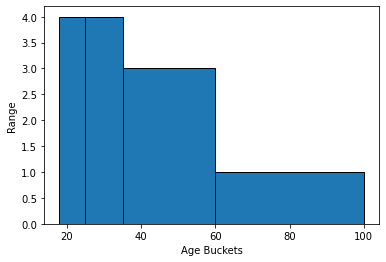

In [56]:
plt.hist(x = ages, bins = bins, edgecolor = 'k')
plt.xlabel('Age Buckets')
plt.ylabel('Range')